In [1]:

import torch
import numpy as np
import cv2
import torch.nn.functional as F
import matplotlib.pyplot as plt

h, w = 1, 500
x0, y0, x1, y1 = torch.tensor([[100]]), torch.tensor([[100]]), torch.tensor([[200]]), torch.tensor([[300]])
N = 1
x0_int, y0_int = 0, 0
x1_int, y1_int = w, h
img_y = torch.arange(y0_int, y1_int, dtype=torch.float32) + 0.5
img_x = torch.arange(x0_int, x1_int, dtype=torch.float32) + 0.5
img_y = (img_y - y0) / (y1 - y0) * 2 - 1
img_x = (img_x - x0) / (x1 - x0) * 2 - 1

gx = img_x[:, None, :].expand(N, img_y.size(1), img_x.size(1))
gy = img_y[:, :, None].expand(N, img_y.size(1), img_x.size(1))
grid = torch.stack([gx, gy], dim=3)
print(gx,gy)

tensor([[[-2.9900, -2.9700, -2.9500, -2.9300, -2.9100, -2.8900, -2.8700,
          -2.8500, -2.8300, -2.8100, -2.7900, -2.7700, -2.7500, -2.7300,
          -2.7100, -2.6900, -2.6700, -2.6500, -2.6300, -2.6100, -2.5900,
          -2.5700, -2.5500, -2.5300, -2.5100, -2.4900, -2.4700, -2.4500,
          -2.4300, -2.4100, -2.3900, -2.3700, -2.3500, -2.3300, -2.3100,
          -2.2900, -2.2700, -2.2500, -2.2300, -2.2100, -2.1900, -2.1700,
          -2.1500, -2.1300, -2.1100, -2.0900, -2.0700, -2.0500, -2.0300,
          -2.0100, -1.9900, -1.9700, -1.9500, -1.9300, -1.9100, -1.8900,
          -1.8700, -1.8500, -1.8300, -1.8100, -1.7900, -1.7700, -1.7500,
          -1.7300, -1.7100, -1.6900, -1.6700, -1.6500, -1.6300, -1.6100,
          -1.5900, -1.5700, -1.5500, -1.5300, -1.5100, -1.4900, -1.4700,
          -1.4500, -1.4300, -1.4100, -1.3900, -1.3700, -1.3500, -1.3300,
          -1.3100, -1.2900, -1.2700, -1.2500, -1.2300, -1.2100, -1.1900,
          -1.1700, -1.1500, -1.1300, -1.1100, -1.09

In [2]:
grid.shape

torch.Size([1, 1, 500, 2])

torch.Size([1, 1, 100, 100])
torch.Size([1, 1, 1, 500])


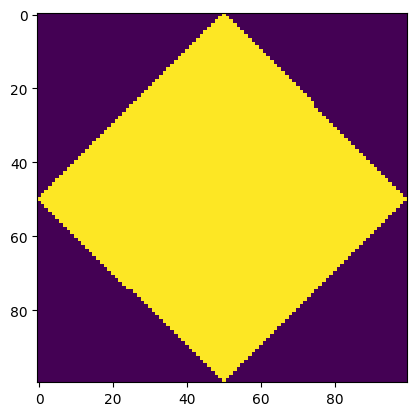

In [3]:
mask = np.zeros((100, 100), dtype=np.uint8)
ct = np.array([[50, 0],[99, 50], [50, 99], [0, 50]], dtype=np.int32)
mask = cv2.drawContours(mask, [ct], -1, 255,  cv2.FILLED)
plt.figure(1)
plt.imshow(mask)
mask = torch.from_numpy(mask)
masks = mask[None, None, :]
print(masks.shape)
if not torch.jit.is_scripting():
    if not masks.dtype.is_floating_point:
        masks = masks.float()
        
img_masks = F.grid_sample(masks, grid.to(masks.dtype), align_corners=False)
print(img_masks.shape)
# plt.figure(2)
# plt.imshow(img_masks.squeeze().numpy().astype(np.uint8))

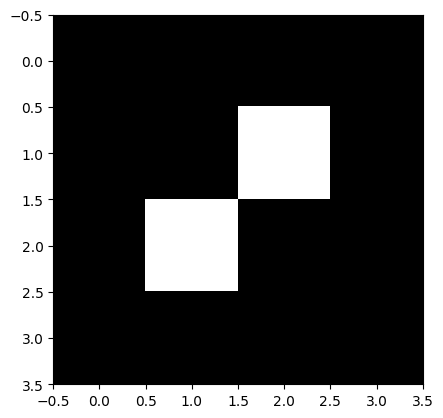

In [4]:
maze = torch.tensor([[0,0,0,0],
                     [0,0,1,0],
                     [0,1,0,0],
                     [0,0,0,0]],
                    )

plt.imshow(maze,cmap='grey')

In [5]:
maze = maze[None,None,...].to(dtype=torch.float)
maze.shape

torch.Size([1, 1, 4, 4])

In [6]:
pcd = torch.tensor([[1,1],
                    [1,2],
                    [2,1],
                    [2,2]])
pcd = pcd[None,None,...]/3 *2 - 1
pcd.shape

torch.Size([1, 1, 4, 2])

In [7]:
v = F.grid_sample(maze,pcd,align_corners=True,)

In [8]:
v.shape,v

(torch.Size([1, 1, 1, 4]), tensor([[[[0., 1., 1., 0.]]]]))

In [31]:
proprio = torch.rand(1,4)
# print(time)
time = proprio[...,-1]
print(time.shape)
time.expand(16384,1).shape

torch.Size([1])


torch.Size([16384, 1])

In [4]:
def twosum(self, nums, target):
    numMap = {}
    n = len(nums)
    for i in range(n):
        c = target - nums[i]
        if c in numMap:
            return [numMap[c],i]
        numMap[nums[i]] = i
    return []

nums = [2,15,6,7]
target = 9
print(twosum(nums,target))

TypeError: twosum() missing 1 required positional argument: 'target'

In [ ]:
import torch

voxel_values_pruned_flat = torch.rand(1,16384,7)

In [ ]:
_ones_max_coords = torch.ones((1, 16384, 1))
_ones_max_coords[:, :16384].shape

In [ ]:
voxel_values_pruned_flat.view(-1,7).shape

In [ ]:
batch_indices = torch.arange(1, dtype=torch.int).view(1, 1, 1)
_tiled_batch_indices = batch_indices.repeat([1, 16384, 1])
batch_indices.shape, _tiled_batch_indices.shape
# self.register_buffer('_tiled_batch_indices', batch_indices.repeat([1, 16384, 1]))

In [ ]:
_tiled_batch_indices[:, :16384].shape
all_indices = torch.rand(16384,4)


In [ ]:
d = torch.rand(100,100,100,7)
# print(d)
print(d[...,-1:].shape)

In [ ]:
w = 100 + 2
arange = torch.arange(0, w, dtype=torch.float, )
index_grid = torch.cat([
            arange.view(w, 1, 1, 1).repeat([1, w, w, 1]),
            arange.view(1, w, 1, 1).repeat([w, 1, w, 1]),
            arange.view(1, 1, w, 1).repeat([w, w, 1, 1])], dim=-1).unsqueeze(
            0).repeat([1, 1, 1, 1, 1])

In [ ]:
index_grid.shape